In [3]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:

print("First few rows:")
display(df.head())
print("\nData info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())


First few rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embark

In [6]:
df['Age']=df['Age'].fillna(method='ffill').fillna(method='bfill')
df[['Age']].head(5)

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [9]:
df['Cabin']=df['Cabin'].fillna('unknown')
df[['Cabin']].head(5)

,Cabin
0,unknown
1,unknown
2,unknown
3,unknown
4,unknown


In [10]:
df=df.drop_duplicates()
print("removed",df.shape)

removed (418, 12)


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df[['Sex']].head()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Sex
0,1
1,0
2,1
3,1
4,0


In [12]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
df[['Fare']].head()


,Fare
0,-0.497811
1,-0.512660
2,-0.464532
3,-0.482888
4,-0.417971


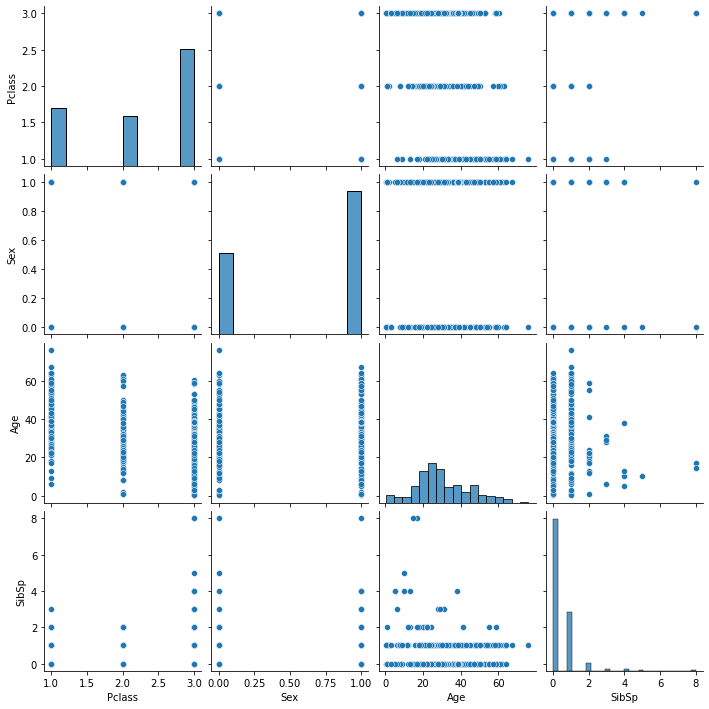

In [13]:


import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['Pclass', 'Sex', 'Age', 'SibSp']
sns.pairplot(df[selected_features])
plt.show()


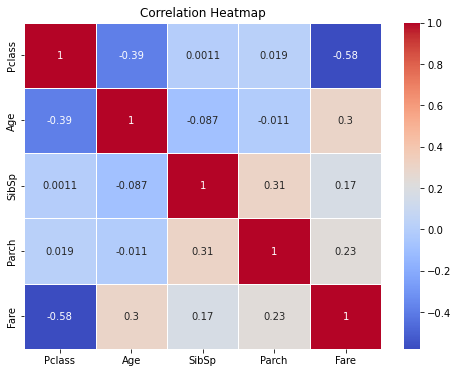

In [14]:


corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
